# We Will build a model to detect the likelihood of fatality by heart Failure 

# We will start by importing various python libraries, then import data and  inspect the data for missing values and then do things accordingly

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# We will check the head of data, describe the data and derive various info

In [5]:
data.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# By doing this we know that there are no missing values and all the values are    good and there is no need of conversion 

# We will do some visualization to get some insights

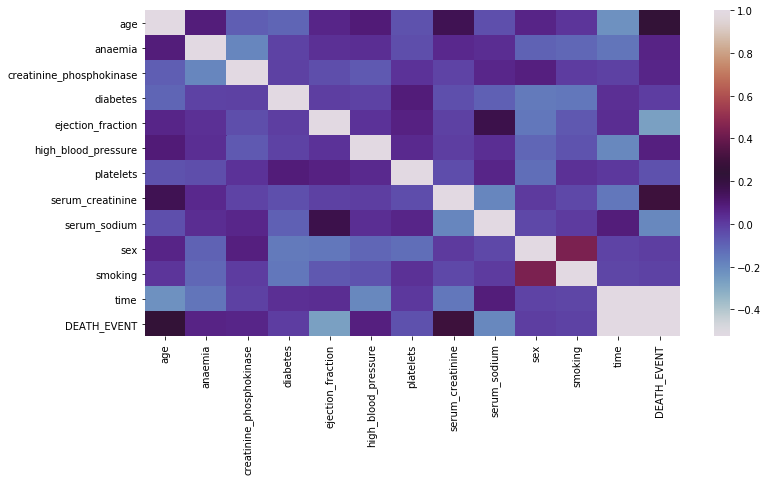

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),cmap='twilight')

# This heatmap shows that Death is highly correlated to time, age and serum_sodium

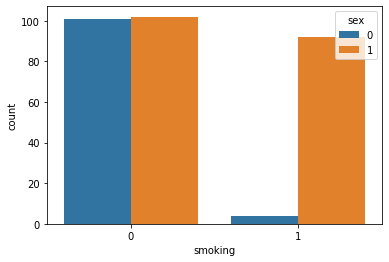

In [15]:
sns.countplot(data= data, x ='smoking',hue = 'sex')

# It is clear from the countplot that among the smokers there are mostly men.     
# Men (1) and Women(0) are represented by Binaries 

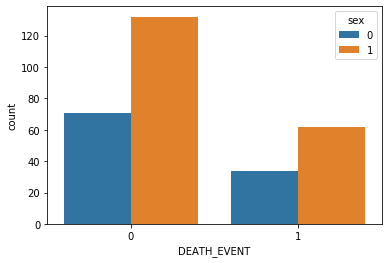

In [17]:
sns.countplot(data =data,x='DEATH_EVENT',hue='sex')

# This is clear from this countplot that death in case of men is higher than         women

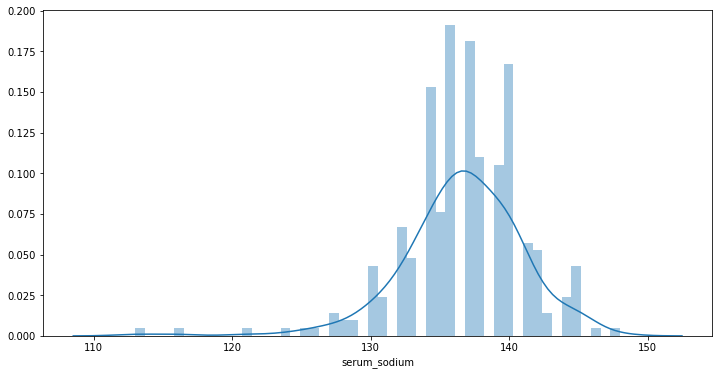

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(data['serum_sodium'],bins =50)

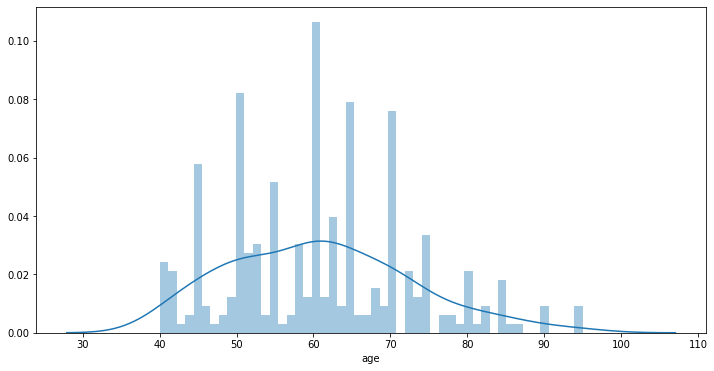

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(data['age'],bins = 50)

# The above two Distribution plots show the distribution of age and serum_sodium in the dataset

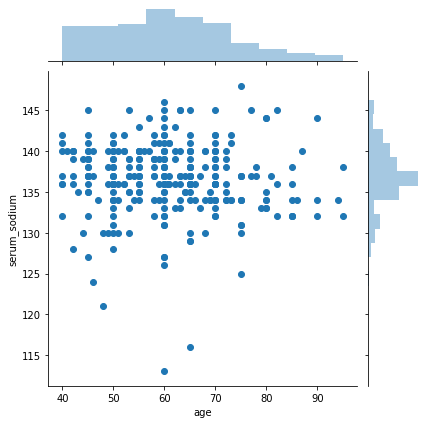

In [31]:
sns.jointplot(x='age',y='serum_sodium',data=data)

# Now we divide our dataset into X(Variables) and y(Dependent )


In [33]:
X= data.drop('DEATH_EVENT',axis = 1)

In [32]:
y = data['DEATH_EVENT']

# We will split the data into train and test set

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

In [36]:
X_train.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87


In [37]:
y_train.head(1)

101    0
Name: DEATH_EVENT, dtype: int64

# Now we have our train and test model we will now build our machine larning model

# We will normalize the data to make it easy for our model to read

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

# We don't fit X_test because we will make predictions on this

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [52]:
X_train

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.29537367],
       [0.45454545, 0.        , 0.01148252, ..., 1.        , 0.        ,
        0.22419929],
       [0.81818182, 0.        , 0.        , ..., 1.        , 0.        ,
        0.08540925],
       ...,
       [0.27272727, 0.        , 0.09249809, ..., 1.        , 0.        ,
        0.29893238],
       [0.07272727, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.85409253],
       [0.72727273, 0.        , 0.11163562, ..., 1.        , 1.        ,
        0.29537367]])

# Building the Model

In [42]:
import tensorflow as tf

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Dense is used to add deep learning neuron layers 
# Dropout is used to drop randon layers while training to increase efficiency

In [53]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dropout(.30))

model.add(Dense(50,activation='relu'))
model.add(Dropout(.15))

model.add(Dense(25,activation='relu'))
model.add(Dropout(.10))

model.add(Dense(12,activation='relu'))

model.add(Dense(1,activation='sigmoid')) 
#This is the output layer

model.compile(loss ='binary_crossentropy',optimizer ='adam')


In [54]:
model.fit(x= X_train, y = y_train, epochs= 25, verbose = 1, shuffle=True)

Epoch 1/25
7/7 [==============================] - 0s 1ms/step - loss: 0.6423
Epoch 2/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5990
Epoch 3/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 4/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5677
Epoch 5/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5580
Epoch 6/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5414
Epoch 7/25
7/7 [==============================] - 0s 2ms/step - loss: 0.5431
Epoch 8/25
7/7 [==============================] - 0s 2ms/step - loss: 0.5092
Epoch 9/25
7/7 [==============================] - 0s 1ms/step - loss: 0.5069
Epoch 10/25
7/7 [==============================] - 0s 1ms/step - loss: 0.4998
Epoch 11/25
7/7 [==============================] - 0s 1ms/step - loss: 0.4882
Epoch 12/25
7/7 [==============================] - 0s 2ms/step - loss: 0.4735
Epoch 13/25
7/7 [==============================] - 0s 1ms/step - loss: 0.

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  1300      
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_16 (Dense)             multiple                  5050      
_________________________________________________________________
dropout_10 (Dropout)         multiple                  0         
_________________________________________________________________
dense_17 (Dense)             multiple                  1275      
_________________________________________________________________
dropout_11 (Dropout)         multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                 

In [60]:
model_loss = pd.DataFrame(model.history.history)

In [65]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        57
           1       0.84      0.62      0.71        42

    accuracy                           0.79        99
   macro avg       0.80      0.77      0.77        99
weighted avg       0.80      0.79      0.78        99



In [74]:
print(confusion_matrix(y_test,pred))

[[52  5]
 [16 26]]


# We can further improve the efficiency of the model by adding early stop 

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
stop = EarlyStopping(monitor='val_loss',mode = 'min' , patience=15, verbose = 1)

# For this we need to rebuild and train the model

In [125]:
model1 = Sequential()

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(.5))

model1.add(Dense(50,activation='relu'))
model1.add(Dropout(.3))

model1.add(Dense(25,activation='relu'))
model1.add(Dropout(.3))

model1.add(Dense(12,activation='relu'))

model1.add(Dense(1,activation='sigmoid')) 
#This is the output layer

model1.compile(loss ='binary_crossentropy',optimizer ='adam')



In [126]:
model1.fit(x = X_train,
         y = y_train,
         validation_split=.1,
         verbose = 1,
         shuffle = True,
         epochs = 100, #This is the number of times whole data is passed through the model
         callbacks = [stop])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 15ms/step - loss: 0.6532 - val_loss: 0.5609
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6539 - val_loss: 0.4870
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6115 - val_loss: 0.4298
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6019 - val_loss: 0.3880
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6021 - val_loss: 0.3563
Epoch 6/100
6/6 [=====

In [127]:
loss1 = pd.DataFrame(model1.history.history)

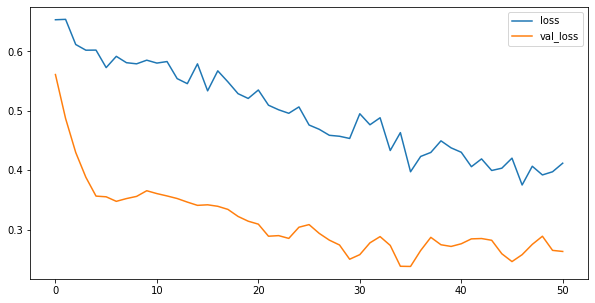

In [133]:
loss1.plot(figsize=(10,5))

In [129]:
pred1 = model1.predict_classes(X_test)

In [130]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        57
           1       0.90      0.62      0.73        42

    accuracy                           0.81        99
   macro avg       0.83      0.78      0.79        99
weighted avg       0.82      0.81      0.80        99



In [131]:
print(confusion_matrix(y_test,pred1))

[[54  3]
 [16 26]]


# This has improved the model Slightly. We can keep on Improving the model further if we want

# We can use model.predict_classes to predict for any new patient... Enter the data as a numpy array and match the number of columns as for training data